In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def check(symbol, interval):
    title_name=["Date","Open","High","Low","Close","Volumn","Close time","Quote asset volume","Number of trades",
                "Taker buy base asset volume","Taker buy quote asset volume","Ignore"]
    
    url='https://api.binance.com/api/v3/klines'
    parameters = {
        "symbol":symbol,
        "interval":interval,
        "limit":1000
    }
    
    session = requests.get(url, params=parameters).json()
    df = pd.DataFrame(session, columns=title_name).astype("float")
    df = df.set_index(pd.to_datetime(df["Date"],unit="ms"))
    df = df[["Open","High","Low","Close","Volumn"]]
    return df

In [3]:
def RSI (data, time_window):
    diff=data.diff(1).dropna()
    up_chg=0*diff
    down_chg=0*diff
    
    up_chg[diff>0] = diff[diff>0]
    down_chg[diff<0] = diff[diff<0]

    up_chg_avg = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [4]:
def run_grpah():
    #Bitcoin EMA
    plt.figure(figsize=(16,8))
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Price", fontsize=18)
    plt.title("BTC/USDT", fontsize=20)
    Bitcoin = check("BTCUSDT","1h")
    Bitcoin['20EMA']=Bitcoin['Close'].ewm(span=20).mean()
    Bitcoin['200EMA']=Bitcoin['Close'].ewm(span=200).mean()
    plt.plot(Bitcoin["Close"], label="Close Price")
    plt.plot(Bitcoin["20EMA"], '--', label="20EMA")
    plt.plot(Bitcoin["200EMA"], '--',label="200EMA")
    plt.legend()
    plt.show()
    
    #Bitcoin RSI
    Bitcoin['RSI'] = RSI(Bitcoin['Close'], 14)
    plt.figure(figsize=(16,8))
    plt.plot(Bitcoin["RSI"])
    plt.axhline(30, linestyle='--')
    plt.axhline(70, linestyle='--')
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("RSI", fontsize=18)
    plt.title("BTC/USDT RSI(14)", fontsize=20)
    plt.show()

    #Ethereum EMA
    plt.figure(figsize=(16,8))
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Price", fontsize=18)
    plt.title("ETH/USDT", fontsize=20)
    Ethereum = check("ETHUSDT","1h")
    Ethereum['20EMA']=Ethereum['Close'].ewm(span=20).mean()
    Ethereum['200EMA']=Ethereum['Close'].ewm(span=200).mean()
    plt.plot(Ethereum["Close"], label="Close Price")
    plt.plot(Ethereum["20EMA"], '--', label="20EMA")
    plt.plot(Ethereum["200EMA"], '--',label="200EMA")
    plt.legend()
    plt.show()
    
    #Ethereum RSI
    Ethereum['RSI'] = RSI(Ethereum['Close'], 14)
    plt.figure(figsize=(16,8))
    plt.plot(Ethereum["RSI"])
    plt.axhline(30, linestyle='--')
    plt.axhline(70, linestyle='--')
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("RSI", fontsize=18)
    plt.title("ETH/USDT RSI(14)", fontsize=20)
    plt.show()

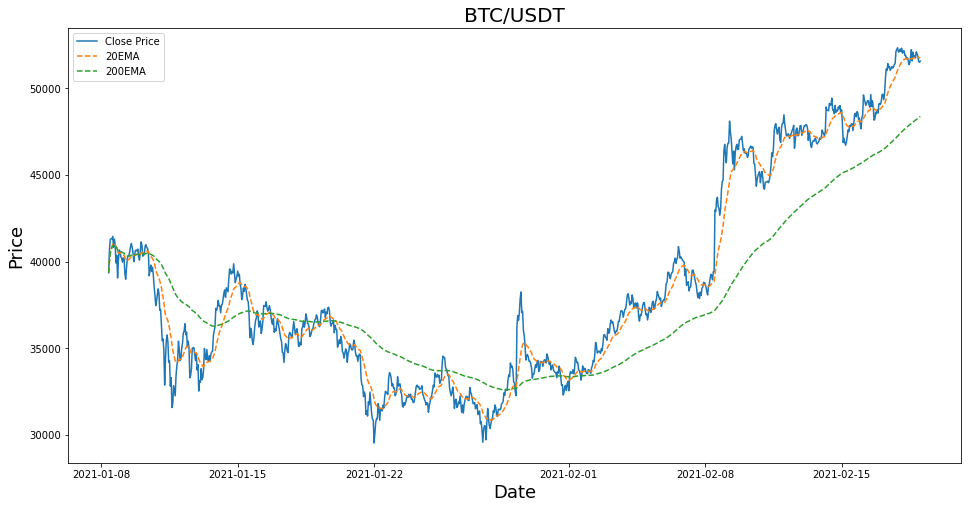

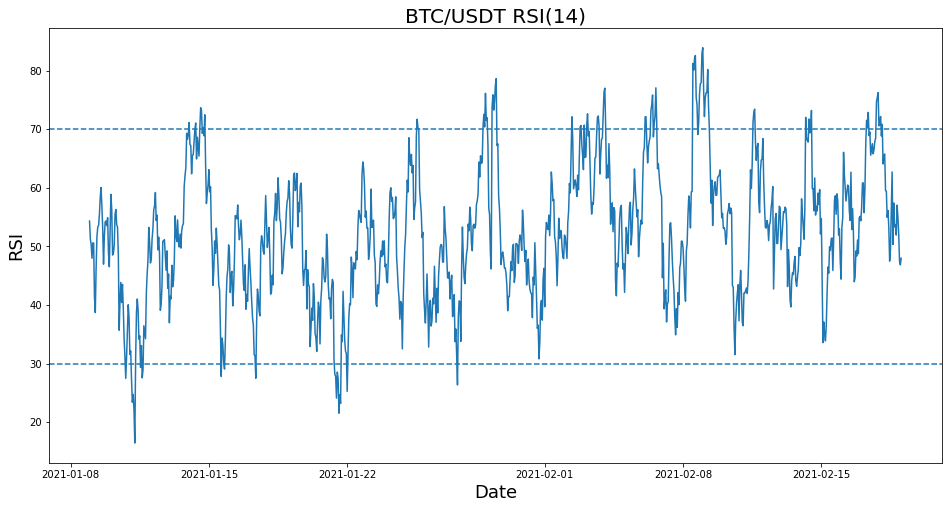

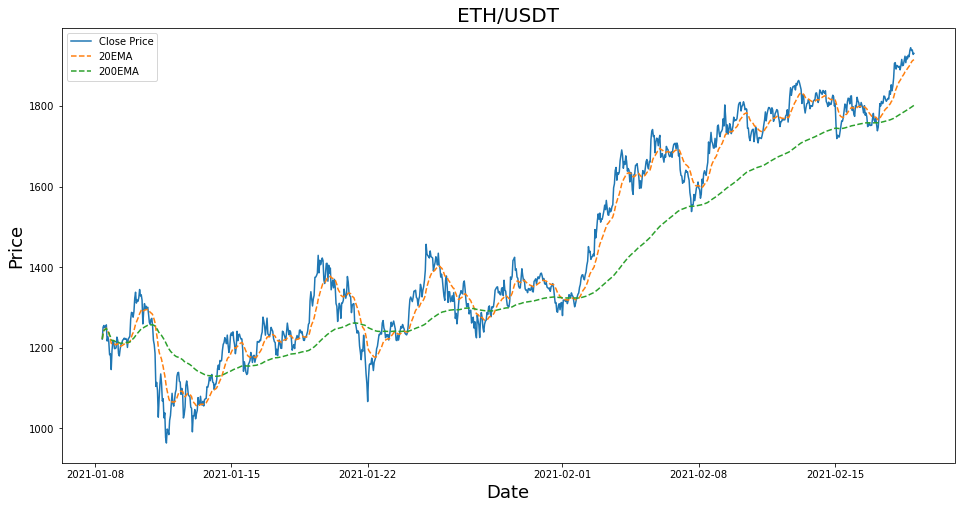

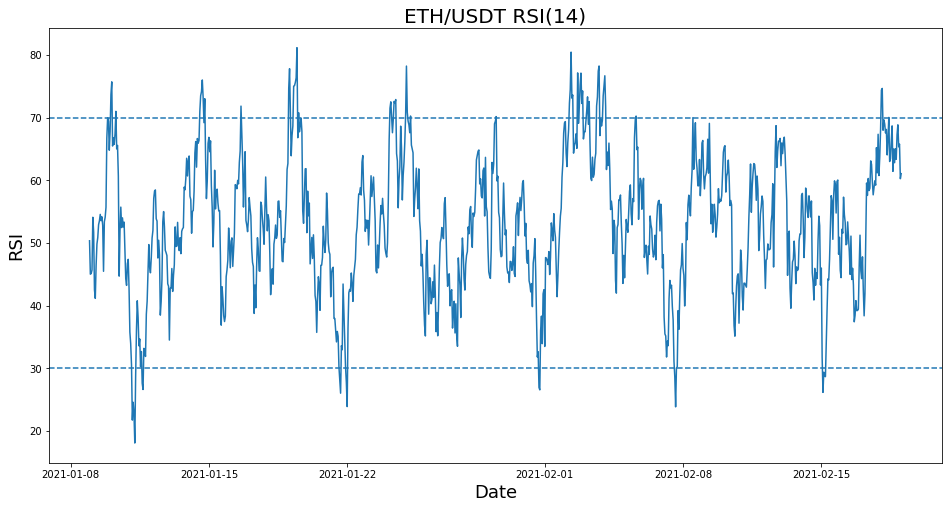

In [5]:
run_grpah()